# Time series of exchange rate MXN-USD

## Modules

In [223]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

## Data

In [149]:
data= pd.read_csv("VRodCDatosTcamNomAgo76.csv",  header=None)
data.rename(columns={0:'Value'}, inplace=True)

### Get date

In [150]:
data["Date"]= list(pd.date_range(start='1976-08-01', periods=len(data), freq='M'))
data.set_index('Date', inplace=True)

## Preprossesing

In [214]:
df= data.copy()

### Log transformation

In [215]:
df["LogValue"]= df["Value"].apply(lambda x: np.log(x))

In [216]:
df["AuxDate"]= df.index

### Visualization

[Text(0.5, 1.0, 'Time series exchange')]

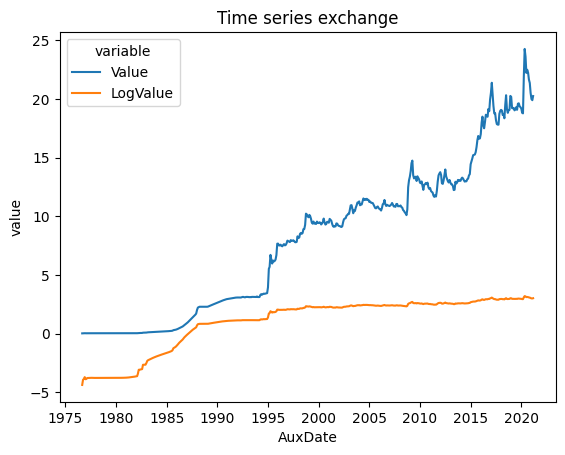

In [154]:
sns.lineplot(x='AuxDate', y='value', hue='variable',data=pd.melt(df, ['AuxDate'])).set(title='Time series exchange')

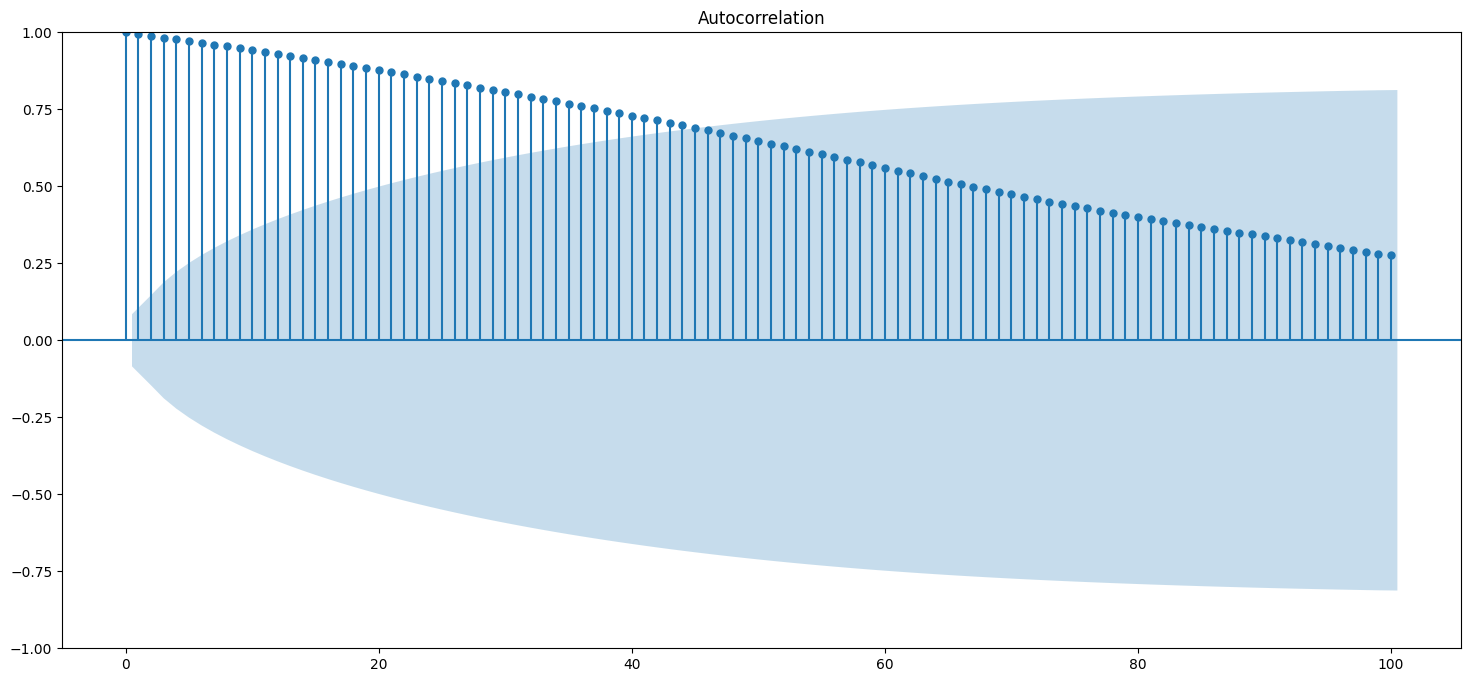

In [155]:
fig=plot_acf(df["LogValue"], lags=100)
fig.set_size_inches(18.05, 8)
plt.show()

### Create dummies

In [167]:
def DummiePulse(i,n):
    ls=[0 for x in range(n)]
    ls[i]= 1
    return ls
def DummieLevel(i,n):
    ls=[1 if x>i else 0 for x in range(n) ]
    return ls
def DummieTendency(i,n):
    ls=[0 if x<i else x-i+1 for x in range(n)]
    return ls

In [217]:
df["Ago76P"] = DummiePulse(0, len(df))
df["Dic94P"]= DummiePulse(220,len(df))
df["Ene95P"]= DummiePulse(220,len(df))

In [218]:
df["Jun77L"] =DummieLevel(9,len(df))
df["Ene95L"] =DummieLevel(220,len(df))

In [219]:
df["Nv81T"]=DummieTendency(63,len(df))
df["Ene88T"]= DummieTendency(137, len(df))

In [224]:
df["Time"]= [x+1 for x in range(len(df))]

## Modeling

### Get tendency

In [229]:
X=df[["Time", "Ago76P", "Jun77L", "Nv81T", "Ene88T", "Ene95L"]]
y= df["LogValue"]

In [233]:
X = sm.add_constant(X)

In [234]:
model= sm.OLS(y,X).fit()

In [273]:
df["Tendency"]=model.predict(X)
df["W"]= df["LogValue"]-df["Tendency"]

#### Plot without tendency

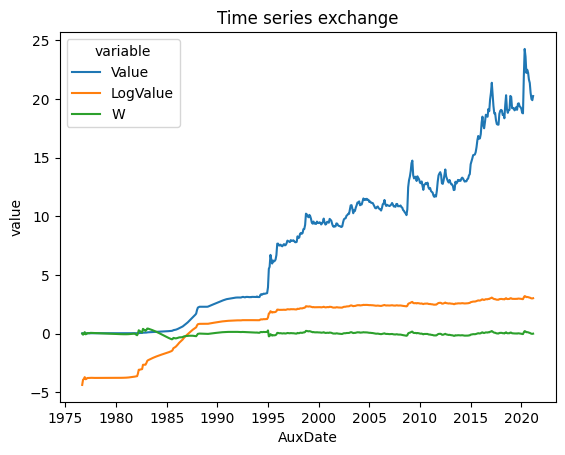

In [241]:
g=sns.lineplot(x='AuxDate', y='value', hue='variable',data=pd.melt(df,id_vars=['AuxDate'],value_vars=["Value", "LogValue", "W"] ))
g.set(title='Time series exchange')
plt.show()

## Filters

In [255]:
import numpy, scipy.signal
taps = numpy.repeat(1/6, 7)
smoothed_x = scipy.signal.lfilter(taps, 1.0, df["W"])

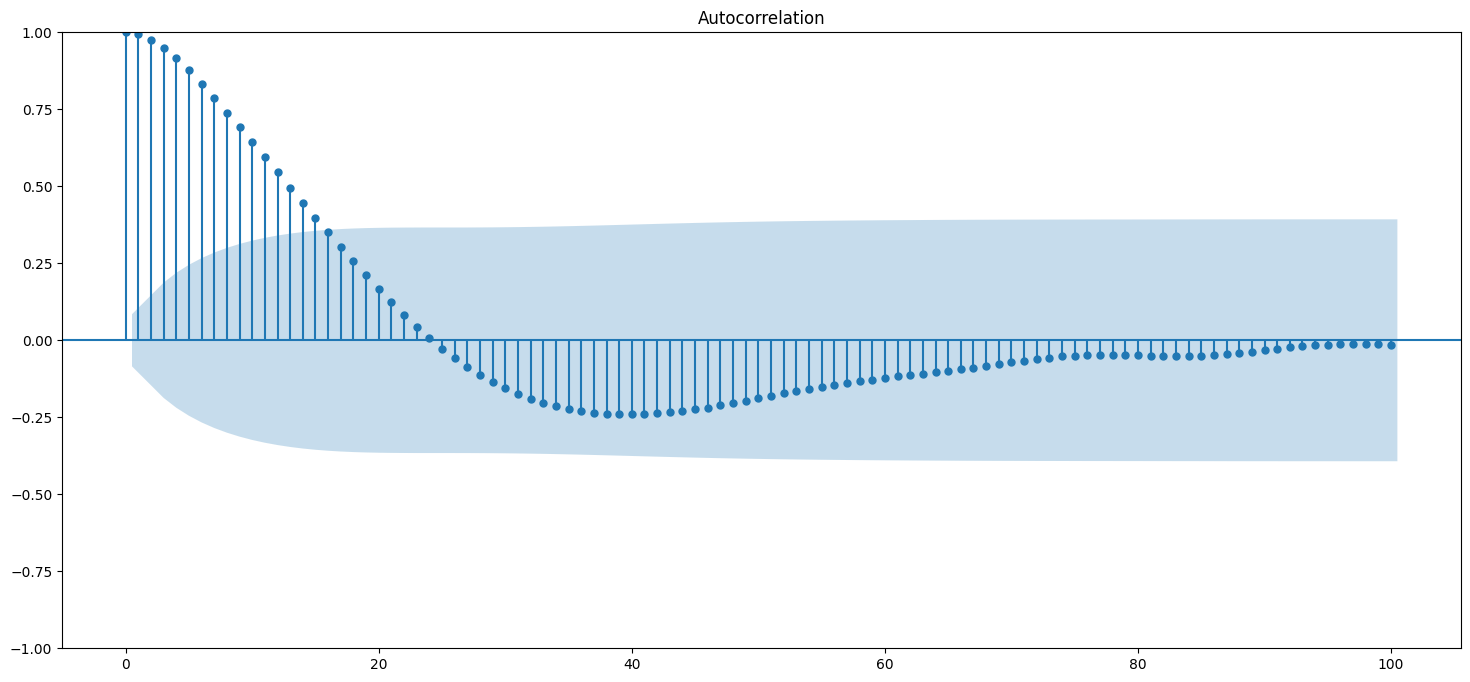

In [256]:
fig=plot_acf(smoothed_x, lags=100)
fig.set_size_inches(18.05, 8)
plt.show()

In [286]:
from scipy.signal import convolve, fftconvolve


# Define filter coefficients
coeffs = np.repeat(1/6, 7)

# Apply filter using convolution
filtered_signal = convolve(df["W"], coeffs, mode='same')

In [292]:
import numpy as np
import statsmodels.api as sm

# Define time series
y1eu2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Perform Ljung-Box test
lags = 11
test_results = sm.stats.acorr_ljungbox(y1eu2, lags=lags, boxpierce=False, return_df=True)

# Print test results
print(test_results)

ValueError: operands could not be broadcast together with shapes (9,) (11,) 

In [300]:
test_results = sm.stats.acorr_ljungbox(y1eu2, lags=9, boxpierce=False, return_df=True)

In [301]:
test_results

,lb_stat,lb_pvalue
1,6.533333,0.010587
2,9.080992,0.010668
3,9.458953,0.023772
4,9.583104,0.048067
5,11.175390,0.048011
6,15.411203,0.017289
7,22.507989,0.002075
8,31.255096,0.000127
9,38.484848,0.000014


In [295]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Define time series
y1eu2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Initialize list to store test results
results = []

# Perform Ljung-Box test for lags 1 to 50
for lag in range(1, 10):
    test_results = sm.stats.acorr_ljungbox(y1eu2, lags=lag, boxpierce=False, return_df=True)
    results.append(test_results)

# Convert list of test results to pandas DataFrame
results_df = pd.concat(results, axis=1)

# Add column names to DataFrame
col_names = [f"Lag_{lag}" for lag in range(1, 10)]
results_df.columns = col_names

# Print results
print(results_df)

ValueError: Length mismatch: Expected axis has 18 elements, new values have 9 elements

In [296]:
results_df

,lb_stat,lb_pvalue,lb_stat,lb_pvalue,lb_stat,lb_pvalue,lb_stat,lb_pvalue,lb_stat,lb_pvalue,lb_stat,lb_pvalue,lb_stat,lb_pvalue,lb_stat,lb_pvalue,lb_stat,lb_pvalue
1,6.533333,0.010587,6.533333,0.010587,6.533333,0.010587,6.533333,0.010587,6.533333,0.010587,6.533333,0.010587,6.533333,0.010587,6.533333,0.010587,6.533333,0.010587
2,NaN,NaN,9.080992,0.010668,9.080992,0.010668,9.080992,0.010668,9.080992,0.010668,9.080992,0.010668,9.080992,0.010668,9.080992,0.010668,9.080992,0.010668
3,NaN,NaN,NaN,NaN,9.458953,0.023772,9.458953,0.023772,9.458953,0.023772,9.458953,0.023772,9.458953,0.023772,9.458953,0.023772,9.458953,0.023772
4,NaN,NaN,NaN,NaN,NaN,NaN,9.583104,0.048067,9.583104,0.048067,9.583104,0.048067,9.583104,0.048067,9.583104,0.048067,9.583104,0.048067
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.175390,0.048011,11.175390,0.048011,11.175390,0.048011,11.175390,0.048011,11.175390,0.048011
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.411203,0.017289,15.411203,0.017289,15.411203,0.017289,15.411203,0.017289
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.507989,0.002075,22.507989,0.002075,22.507989,0.002075
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.255096,0.000127,31.255096,0.000127
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.484848,0.000014
